In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
# 日本語フォントの指定
mpl.rcParams['font.family'] = 'IPAexGothic' # ここにインストールしたフォント名を入れる

from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import StratifiedKFold
from nyaggle.feature.category_encoder import TargetEncoder

from nyaggle.experiment import run_experiment

In [3]:
train_ver1 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver1.csv')
test_ver1 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver1.csv')

train_ver2 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/train_feature_ver2.csv')
test_ver2 = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/test_feature_ver2.csv')

era = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/era.csv')
sample_submission = pd.read_csv('yukiCup2023Autumn-atmaCup_dataset/yukiCup 2023 Autumn x atmaCup/sample_submission.csv')

In [4]:
train = pd.concat([train_ver1, train_ver2.iloc[:, 17:]], axis=1)
test = pd.concat([test_ver1, test_ver2.iloc[:, 16:]], axis=1)

In [5]:
train

,名称,棟名,種別2,国,時代,都道府県 ※美工品は「所有者住所（所在都道府県）」,所在地,保管施設の名称,所有者名,管理団体又は責任者,...,502,503,504,505,506,507,508,509,510,511
0,泉布観,NaN,近代／文化施設,NaN,明治,大阪府,大阪府大阪市北区天満橋一丁目1番1号,NaN,大阪市,NaN,...,0.040735,-0.065313,0.024066,0.058878,0.039472,-0.056688,0.060788,-0.017720,0.039419,-0.028479
1,絹本著色准胝仏母像,NaN,絵画,日本,鎌倉,京都府（京都府）,NaN,NaN,広隆寺,NaN,...,-0.015019,-0.015766,0.011216,0.049469,-0.003283,0.037911,-0.013454,0.032349,-0.018078,-0.066517
2,石上神宮拝殿,NaN,近世以前／寺院,NaN,鎌倉前期,奈良県,奈良県天理市布留町,NaN,石上神宮,NaN,...,-0.019966,-0.045495,0.018180,0.069067,0.033640,-0.031086,-0.029206,0.024308,-0.033962,-0.056491
3,剣〈銘真守（備前）／〉,NaN,工芸品,日本,鎌倉,和歌山県（和歌山県）,NaN,NaN,宗教法人金剛峯寺,財団法人高野山文化財保存会,...,-0.016288,0.025658,-0.018713,0.048917,0.038189,-0.005544,0.053331,0.070407,-0.056074,-0.017977
4,旧新町紡績所,工場本館,近代／産業・交通・土木,NaN,明治,群馬県,群馬県高崎市新町二三三〇番地,NaN,クラシエフーズ株式会社,NaN,...,0.037913,-0.039413,-0.000997,0.051042,0.070350,-0.041066,-0.049664,-0.045815,-0.029116,-0.069523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6705,平家物語,NaN,書跡・典籍,日本,室町,東京都（東京都）,東京都世田谷区上野毛3-9-25,公益財団法人五島美術館,公益財団法人五島美術館,NaN,...,0.049616,-0.016639,-0.015519,0.023629,-0.067995,-0.025893,0.049082,0.051007,-0.070755,-0.005022
6706,因明論疏〈巻上中／〉,NaN,書跡・典籍,日本,平安,東京都（東京都）,東京都世田谷区上野毛3-9-25,公益財団法人五島美術館,公益財団法人五島美術館,NaN,...,0.049323,0.000817,0.012005,0.044559,-0.054302,-0.012325,0.045287,0.055104,-0.071356,-0.012268
6707,石燈籠,NaN,工芸品,日本,鎌倉,京都府（京都府）,公益財団法人北村文華財団 京都府京都市上京区御車道通清和院口上ル東入梶井町448-4,公益財団法人北村文華財団,公益財団法人北村文華財団,NaN,...,0.026567,0.025216,-0.019941,0.057561,-0.025222,-0.074834,-0.048308,0.024729,-0.028863,-0.005099
6708,孔雀経音義〈真寂法親王撰／〉,NaN,書跡・典籍,日本,平安,京都府（京都府）,NaN,NaN,醍醐寺,NaN,...,-0.024723,-0.036418,0.017122,0.045650,-0.039209,-0.005468,-0.041578,0.033754,-0.016572,-0.049764


In [6]:
agg_cols = ['min', 'max', 'mean', 'std']
use_cols = train_ver2.iloc[:, 17:].columns.tolist()

for col in ['時代', '所有者名', '種別2']:
    grp_df = train.groupby(col)[use_cols].agg(agg_cols)
    grp_df.columns = [f'{col}_' + '_'.join(c) for c in grp_df.columns]
    train = train.merge(grp_df, on=col, how='left')
    test = test.merge(grp_df, on=col, how='left')    

In [7]:
#categorical変数抽出
cat_cols = [c for c in test.columns if train[c].dtype == np.object]
#cat_cols.remove('string') # これは取り除かないといけない

# numerical変数抽出
num_cols = [c for c in test.columns if train[c].dtype != np.object]

#目的変数抽出
target_col = 'is_kokuhou'

print(cat_cols)
print(num_cols)
print(target_col)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


['棟名', '種別2', '国', '時代', '都道府県 ※美工品は「所有者住所（所在都道府県）」', '所在地', '保管施設の名称', '所有者名', '管理団体又は責任者']
['緯度', '経度', '開始', '終了', '緯度*経度', '終了-開始', 'label_棟名', 'label_種別2', 'label_国', 'label_時代', 'label_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'label_所在地', 'label_保管施設の名称', 'label_所有者名', 'label_管理団体又は責任者', 'count_棟名', 'count_種別2', 'count_国', 'count_時代', 'count_都道府県 ※美工品は「所有者住所（所在都道府県）」', 'count_所在地', 'count_保管施設の名称', 'count_所有者名', 'count_管理団体又は責任者', '棟名_緯度_min', '棟名_緯度_max', '棟名_緯度_mean', '棟名_緯度_std', '棟名_経度_min', '棟名_経度_max', '棟名_経度_mean', '棟名_経度_std', '棟名_開始_min', '棟名_開始_max', '棟名_開始_mean', '棟名_開始_std', '棟名_終了_min', '棟名_終了_max', '棟名_終了_mean', '棟名_終了_std', '棟名_緯度*経度_min', '棟名_緯度*経度_max', '棟名_緯度*経度_mean', '棟名_緯度*経度_std', '棟名_終了-開始_min', '棟名_終了-開始_max', '棟名_終了-開始_mean', '棟名_終了-開始_std', '種別2_緯度_min', '種別2_緯度_max', '種別2_緯度_mean', '種別2_緯度_std', '種別2_経度_min', '種別2_経度_max', '種別2_経度_mean', '種別2_経度_std', '種別2_開始_min', '種別2_開始_max', '種別2_開始_mean', '種別2_開始_std', '種別2_終了_min', '種別2_終了_max', '種別2_終了_mean', '種別2_終了_std', '種

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [8]:
# target encoding

# kf = KFold(4)
# kf = KFold(4, groups=train.categorical)　#GroupKFold
kf = StratifiedKFold(5, shuffle=True, random_state=42531) #StratifiedKFold

# Target encoding with K-fold
# te = TargetEncoder(kf.split(train))
# te = TargetEncoder(kf.split(train)) #GroupKFold
te = TargetEncoder(kf.split(train, train[target_col])) #StratifiedKFold

# use fit/fit_transform to train data, then apply transform to test data
train.loc[:, cat_cols] = te.fit_transform(train[cat_cols], train[target_col])
test.loc[:, cat_cols] = te.transform(test[cat_cols])

In [9]:
print(len(cat_cols) + len(num_cols))

6904


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-logloss:0.65610
[1]	validation_0-logloss:0.62278
[2]	validation_0-logloss:0.59248
[3]	validation_0-logloss:0.56502
[4]	validation_0-logloss:0.53921
[5]	validation_0-logloss:0.51565
[6]	validation_0-logloss:0.49441
[7]	validation_0-logloss:0.47443
[8]	validation_0-logloss:0.45683
[9]	validation_0-logloss:0.43952
[10]	validation_0-logloss:0.42418
[11]	validation_0-logloss:0.40975
[12]	validation_0-logloss:0.39696
[13]	validation_0-logloss:0.38462
[14]	validation_0-logloss:0.37357
[15]	validation_0-logloss:0.36306
[16]	validation_0-logloss:0.35347
[17]	validation_0-logloss:0.34426
[18]	validation_0-logloss:0.33537
[19]	validation_0-logloss:0.32748
[20]	validation_0-logloss:0.31999
[21]	validation_0-logloss:0.31308
[22]	validation_0-logloss:0.30666
[23]	validation_0-logloss:0.30071
[24]	validation_0-logloss:0.29494
[25]	validation_0-logloss:0.29003
[26]	validation_0-logloss:0.28498
[27]	validation_0-logloss:0.28030
[28]	validation_0-logloss:0.27592
[29]	validation_0-loglos

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-logloss:0.65684
[1]	validation_0-logloss:0.62397
[2]	validation_0-logloss:0.59409
[3]	validation_0-logloss:0.56716
[4]	validation_0-logloss:0.54239
[5]	validation_0-logloss:0.51951
[6]	validation_0-logloss:0.49913
[7]	validation_0-logloss:0.48040
[8]	validation_0-logloss:0.46204
[9]	validation_0-logloss:0.44529
[10]	validation_0-logloss:0.42993
[11]	validation_0-logloss:0.41557
[12]	validation_0-logloss:0.40233
[13]	validation_0-logloss:0.39026
[14]	validation_0-logloss:0.37932
[15]	validation_0-logloss:0.36864
[16]	validation_0-logloss:0.35845
[17]	validation_0-logloss:0.34926
[18]	validation_0-logloss:0.34072
[19]	validation_0-logloss:0.33277
[20]	validation_0-logloss:0.32532
[21]	validation_0-logloss:0.31842
[22]	validation_0-logloss:0.31214
[23]	validation_0-logloss:0.30610
[24]	validation_0-logloss:0.30023
[25]	validation_0-logloss:0.29496
[26]	validation_0-logloss:0.28995
[27]	validation_0-logloss:0.28532
[28]	validation_0-logloss:0.28117
[29]	validation_0-loglos

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-logloss:0.65801
[1]	validation_0-logloss:0.62591
[2]	validation_0-logloss:0.59541
[3]	validation_0-logloss:0.56978
[4]	validation_0-logloss:0.54444
[5]	validation_0-logloss:0.52202
[6]	validation_0-logloss:0.50057
[7]	validation_0-logloss:0.48186
[8]	validation_0-logloss:0.46308
[9]	validation_0-logloss:0.44642
[10]	validation_0-logloss:0.43065
[11]	validation_0-logloss:0.41599
[12]	validation_0-logloss:0.40193
[13]	validation_0-logloss:0.38968
[14]	validation_0-logloss:0.37778
[15]	validation_0-logloss:0.36678
[16]	validation_0-logloss:0.35626
[17]	validation_0-logloss:0.34639
[18]	validation_0-logloss:0.33779
[19]	validation_0-logloss:0.32932
[20]	validation_0-logloss:0.32105
[21]	validation_0-logloss:0.31380
[22]	validation_0-logloss:0.30650
[23]	validation_0-logloss:0.29961
[24]	validation_0-logloss:0.29341
[25]	validation_0-logloss:0.28783
[26]	validation_0-logloss:0.28275
[27]	validation_0-logloss:0.27756
[28]	validation_0-logloss:0.27291
[29]	validation_0-loglos

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-logloss:0.65592
[1]	validation_0-logloss:0.62302
[2]	validation_0-logloss:0.59255
[3]	validation_0-logloss:0.56470
[4]	validation_0-logloss:0.53962
[5]	validation_0-logloss:0.51634
[6]	validation_0-logloss:0.49466
[7]	validation_0-logloss:0.47460
[8]	validation_0-logloss:0.45647
[9]	validation_0-logloss:0.43939
[10]	validation_0-logloss:0.42384
[11]	validation_0-logloss:0.40914
[12]	validation_0-logloss:0.39571
[13]	validation_0-logloss:0.38290
[14]	validation_0-logloss:0.37135
[15]	validation_0-logloss:0.36061
[16]	validation_0-logloss:0.35056
[17]	validation_0-logloss:0.34087
[18]	validation_0-logloss:0.33239
[19]	validation_0-logloss:0.32442
[20]	validation_0-logloss:0.31693
[21]	validation_0-logloss:0.30970
[22]	validation_0-logloss:0.30347
[23]	validation_0-logloss:0.29715
[24]	validation_0-logloss:0.29154
[25]	validation_0-logloss:0.28611
[26]	validation_0-logloss:0.28141
[27]	validation_0-logloss:0.27673
[28]	validation_0-logloss:0.27206
[29]	validation_0-loglos

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-logloss:0.65698
[1]	validation_0-logloss:0.62311
[2]	validation_0-logloss:0.59278
[3]	validation_0-logloss:0.56556
[4]	validation_0-logloss:0.54055
[5]	validation_0-logloss:0.51737
[6]	validation_0-logloss:0.49637
[7]	validation_0-logloss:0.47656
[8]	validation_0-logloss:0.45894
[9]	validation_0-logloss:0.44173
[10]	validation_0-logloss:0.42575
[11]	validation_0-logloss:0.41076
[12]	validation_0-logloss:0.39748
[13]	validation_0-logloss:0.38464
[14]	validation_0-logloss:0.37323
[15]	validation_0-logloss:0.36237
[16]	validation_0-logloss:0.35199
[17]	validation_0-logloss:0.34247
[18]	validation_0-logloss:0.33337
[19]	validation_0-logloss:0.32490
[20]	validation_0-logloss:0.31720
[21]	validation_0-logloss:0.30982
[22]	validation_0-logloss:0.30301
[23]	validation_0-logloss:0.29654
[24]	validation_0-logloss:0.29061
[25]	validation_0-logloss:0.28490
[26]	validation_0-logloss:0.27981
[27]	validation_0-logloss:0.27501
[28]	validation_0-logloss:0.27065
[29]	validation_0-loglos

/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 26178 (\N{CJK UNIFIED IDEOGRAPH-6642}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 31278 (\N{CJK UNIFIED IDEOGRAPH-7A2E}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 21029 (\N{CJK UNIFIED IDEOGRAPH-5225}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 25152 (\N{CJK UNIFIED IDEOGRAPH-6240}) missing from current font.
  plt.tight_layout()
/opt/conda/lib/python3.7/site-packages/nyaggle/util/plot_importance.py:57: UserWarning: Glyph 2

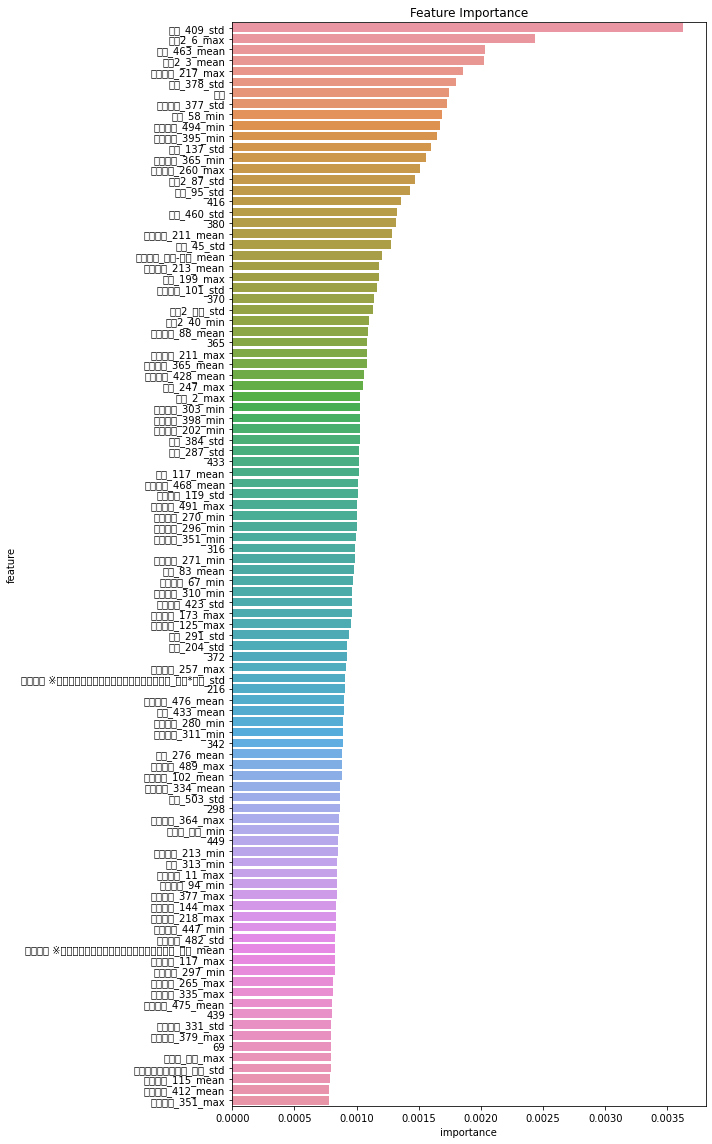

In [10]:
params = {
    "objective": "binary:logistic", #binary:logistic, multi:softmax, multi:softprob, "reg:squarederror"
    "eval_metric" : "logloss", #rmsle, mae, auc, logloss, error, mlogloss, "rmse"
    #num_class = n,
    "learning_rate": 0.05, #0.05
    "n_estimators": 10000,
    "max_depth": 10,
    "seed" : 42531,
    # "tree_method" : 'gpu_hist', #gpu_hisyがアリとなしで結果が変わる　ない方が良いかも
}


result = run_experiment(params,
                        train[num_cols + cat_cols],
                        train[target_col],
                        test[num_cols + cat_cols], 
                        cv=StratifiedKFold(5, shuffle=True, random_state=42531), #cv=4, #cv=StratifiedKFold(4, shuffle=True, random_state=42531)
                        algorithm_type='xgb'
                        #groups=train.group
                        )

In [11]:
print(result.metrics) # Evalulation metrics for each fold

[0.7939371980676329, 0.7870933977455716, 0.811561996779388, 0.7989895330112721, 0.817928690532228, 0.8007404421307167]


In [33]:
print(result.metrics) # Evalulation metrics for each fold

[0.8174516908212561, 0.7968478260869566, 0.8092431561996779, 0.8114533011272141, 0.8378184313193608, 0.8137532311765582]


In [13]:
print(result.metrics) # Evalulation metrics for each fold

[0.8280636070853462, 0.8003582930756844, 0.8178743961352657, 0.8081239935587762, 0.8350818965861131, 0.8174789091490074]


In [10]:
print(result.metrics) # Evalulation metrics for each fold

[0.7830434782608695, 0.7822745571658616, 0.8266908212560387, 0.8261433172302737, 0.8351138095276086, 0.8096638097616974]


In [9]:
print(result.metrics) # Evalulation metrics for each fold

[0.7725885668276973, 0.7818236714975845, 0.8162882447665056, 0.817194041867955, 0.8370046513112228, 0.8053098184368901]


In [12]:
IM = result.importance     # Feature importance for each fold

In [14]:
IM[2].sort_values('importance', ascending=False).head(20)

,feature,importance
1740,時代_247_max,0.005244
934,時代_45_std,0.005166
1221,時代_117_mean,0.005080
2390,時代_409_std,0.005046
5198,種別2_87_std,0.004354
1302,時代_137_std,0.004318
1918,時代_291_std,0.003923
4039,所有者名_310_min,0.003709
2182,時代_357_std,0.003664
3860,所有者名_265_max,0.003363


In [11]:
print(result.test_prediction)  # Test prediction in numpy array
print(result.oof_prediction)   # Out-of-fold prediction in numpy array

[0.02609777 0.21280776 0.47075129 ... 0.09545203 0.02664355 0.0226645 ]
[0.04345985 0.10009054 0.2547681  ... 0.06001944 0.18900089 0.03307965]


In [12]:
train[target_col].to_numpy()

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
# データ全体のF1スコアを計算 & 閾値の最適化
from sklearn.metrics import f1_score

def find_optimal_threshold(y_true, y_scores):
    thresholds = np.linspace(0, 1, 100)
    best_threshold = 0
    best_score = 0

    for threshold in thresholds:
        y_pred = (y_scores > threshold).astype(int)
        score = f1_score(y_true, y_pred)

        if score > best_score:
            best_score = score
            best_threshold = threshold

    return best_threshold, best_score

# 例として使用するデータ（実際にはモデルからの予測値と実際のラベルを使用）
y_true = train[target_col].values
y_scores = result.oof_prediction

best_threshold, best_f1_score = find_optimal_threshold(y_true, y_scores)
print(f"Best threshold: {best_threshold}")
print(f"Best F1 Score: {best_f1_score}")

Best threshold: 0.19191919191919193
Best F1 Score: 0.35996326905417814


In [14]:
# 閾値を超える確率を持つ要素を1に、それ以外を0に変換
y_pred = (result.test_prediction > best_threshold).astype(int)
print(y_pred)
print(y_pred.shape)

[0 1 1 ... 0 0 0]
(10065,)


In [15]:
sample_submission['is_kokuhou'] = y_pred
sample_submission

,is_kokuhou
0,0
1,1
2,1
3,0
4,0
...,...
10060,0
10061,0
10062,0
10063,0


In [16]:
sample_submission["is_kokuhou"].value_counts()

0    9125
1     940
Name: is_kokuhou, dtype: int64

In [21]:
sample_submission.to_csv('xgboost_ver1.csv', index=False)

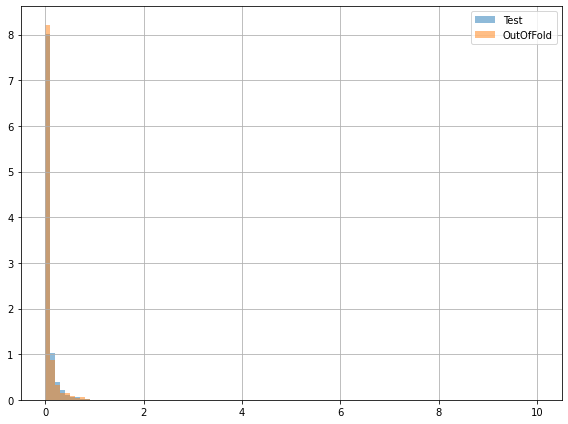

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

vmax = .02
bins = np.linspace(0, 10, 100)
ax.hist(result.test_prediction, bins=bins, density=True, alpha=.5, label="Test")
ax.hist(result.oof_prediction, bins=bins, density=True, alpha=.5, label="OutOfFold")
ax.grid()
ax.legend()
# ax.set_title("テストと学習時の予測傾向差分")

fig.tight_layout()

In [17]:
print(result.test_prediction)
print(result.oof_prediction)

[0.02609777 0.21280776 0.47075129 ... 0.09545203 0.02664355 0.0226645 ]
[0.04345985 0.10009054 0.2547681  ... 0.06001944 0.18900089 0.03307965]


In [18]:
df_oof = pd.DataFrame({'xgb_ver1_oof':result.oof_prediction})
df_test = pd.DataFrame({'xgb_ver1_test' : result.test_prediction})

In [19]:
print(df_oof.shape)
print(df_test.shape)

(6710, 1)
(10065, 1)


In [20]:
df_oof.to_csv('xgb_ver1_oof.csv', index=False)
df_test.to_csv('xgb_ver1_test.csv', index=False)